# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---
#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

---

Antes de iniciar, acesse o portal : https://dados.educacao.sp.gov.br/dataset/fluxo-escolar-por-escola

Procure pelo arquivo CSV relativo a "Fluxo Escolar 2019 - por escola", arquivo `FLUXO_ESCOLAR_ESCOLA.csv`<br>
OBS: esse arquivo estará também no ZIP contendo os dados para esse módulo, caso haja problemas de acesso.

O fluxo escolar é medido pela taxa média de aprovação em cada etapa da escolarização, sendo elas as séries iniciais e séries finais do Ensino Fundamental e Ensino Médio, coletadas pelo Censo Escolar.

Para saber mais sobre o funcionamento do Fluxo Escolar, visite a página https://dados.educacao.sp.gov.br/story/fluxo

Carregue os dados. As colunas possuem significado de acordo com o "dicionário de dados" disponível ao visualizar o arquivo no referido site. As colunas são rotuladas da seguinte forma:
- Ano: para o qual foi realizado o cálculo do fluxo
- CD_DIRETORIA: Código da diretoria de ensino
- NM_DIRETORIA: Nome da diretoria de ensino
- NM_MUNICIPIO: Nome do Município
- CD_REDE_ENSINO: Código da Rede de Ensino (1:Estadual)
- CD_ESCOLA: Código da Escola
- NM_COMPLETO_ESCOLA: Nome Completo da Escola
- CD_TP_IDENTIFICADOR: Código do Tipo de Escola
- APR_1: Porcentagem de Alunos Aprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- REP_1: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- ABA_1: Porcentagem de Alunos com Abandono no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- APR_2: Porcentagem de Alunos Aprovados no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- REP_2: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- ABA_2: Porcentagem de Alunos com Abandono no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- APR_3: Porcentagem de Alunos Aprovados no Ensino Médio
- REP_3: Porcentagem de Alunos Reprovados no Ensino Médio
- ABA_3: Porcentagem de Alunos com Abandono no Ensino Médio

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# carregando dados
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')
ncols = dc.shape[1]
print("atributos: ", ncols)
print("linhas: ", dc.shape[0])

atributos:  16
linhas:  5220


### Questão 1)
 
Considere os seguintes problemas e a natureza dos seus respectivos dados:

I - Uma sequência de dados de um sensor de temperatura, com valores em Celsius coletados e armazenados a cada 2 horas. Utilizando o histórico de 1 ano de observações anteriores até o dia atual, se intenciona predizer a temperatura nas próximas 24 horas.<br>
II - Uma base de dados contendo informações sobre livros (gênero, número de páginas, autor, ano de lançamento, país de origem, entre outros) e as avaliações desses livros (nota de 1 a 5) obtidos junto a leitores do fã clube de Harry Potter de Minas Gerais, com a qual se intenciona predizer qual seria a nota de um livro sendo considerado para publicação por uma editora, permitindo predizer o potencial desse novo livro para o público brasileiro.<br>
III - Numa base de dados de um e-commerce contendo informações sobre clientes e seus padrões de compras, foi feita uma segmentação manual de milhares de clientes em 5 categorias. Deseja-se treinar modelos para aprender a classificar novos clientes em uma dessas categorias.<br>

Podemos utilizar métodos que assumam dados do tipo i.i.d. (independente e identicamente distribuídos) e garantir que esses métodos irão obter conclusões válidas em quais dos casos?

<font color='red'>(a) III<br></font>
(b) I e III<br>
(c) I<br>
(d) II<br>

I - Séries Temporais não são iid pois cada exemplo ou amostra é dependente do exemplo anterior.   
II - Nesse caso há um viés de seleção ou amostragem de conveniência, não tendo sido levada em conta toda a população de interesse. A amostragem de leitores do fã clube de Harry Potter de Minas Gerais não permite predizer o potencial para todo o Brasil nem de outros gêneros.
Viés de amostragem   
. considerado frequentemente o mais perigoso   
. muitos métodos consideram premissas sobre a amostragem   
. frequentemente i.i.d. (independente e identicamente distribuída)

### Questão 2)
 
Compute a média das variáveis ABA_1, ABA_2 e ABA_3 e adicione essa média como um novo atributo ABA_MED à base de dados. Substitua por nulo (`nan`) os valores onde 'ABA_MED' seja igual a 0. Realize a **discretização** da variável 'ABA_MED' utilizando:
1. o método dos quantis, utilizando 7 intervalos alvo
2. o método dos intervalos, utilizando 6 intervalos alvo: (0, 1] (1, 5] (5, 10] (10, 25] (25, 50] (50, max(ABA_MED)],
em que max(ABA_MED) é o maior valor desse atributo

Use o método qcut() para o item 1 e cut() para o item 2

Adicione essa novas variáveis na base, com os nomes 'ABA_Q' (quantis) e 'ABA_I' (intervalos)

Qual é a quantidade de dados (frequências dos valores discretizados) na base após a discretização, relativos ao primeiro intervalo (com os menores valores) e ao último intervalo (com os maiores valores) para, respectivamente, ABA_Q e ABA_I?

(a) ABA_Q: primeiro -0.004, último 423. ABA_I: primeiro 1, último 431<br>
(b) ABA_Q: primeiro 423, último 431. ABA_I: primeiro 1612, último 4<br>
(c) ABA_Q: primeiro 431, último 3099. ABA_I: primeiro 1612, último 0<br>
<font color='red'>(d) ABA_Q: primeiro 431, último 423. ABA_I: primeiro 1612, último 1<br></font>

Menor valor: -0.0033333333333333335
Maior valor: 53.71666666666667


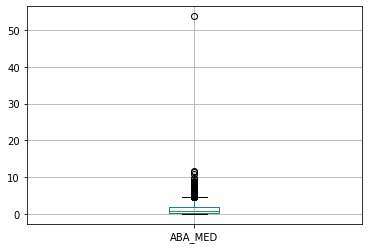

In [2]:
# Criando a nova coluna e inputando os valores
dc['ABA_MED'] = (dc['ABA_1']+dc['ABA_2']+dc['ABA_3'])/3

# substituindo por nulo (nan) onde 'ABA_MED' = 0
dc.loc[dc['ABA_MED']==0, 'ABA_MED'] = np.nan

# boxplot de 'ABA_MED'
print('Menor valor:', (dc['ABA_MED']).min())
print('Maior valor:', (dc['ABA_MED']).max())
atts = 'ABA_MED'
dc.boxplot(atts)

category
(-0.0043300000000000005, 0.143]    431
(0.617, 1.09]                      431
(1.766, 2.91]                      425
(0.314, 0.617]                     424
(2.91, 53.717]                     423
(0.143, 0.314]                     417
(1.09, 1.766]                      415
Name: ABA_Q, dtype: int64


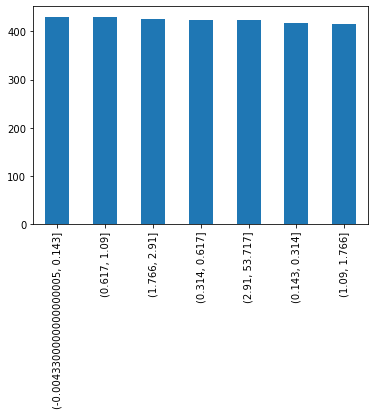

In [3]:
# discretização de 'ABA_MED' pelo método dos quartis, 7 intervalos

# realizar discretizacao e armazenar
aba_quartil =  pd.qcut(dc['ABA_MED'], 7)#, labels=labels)
# inserir nova coluna
ncols = dc.shape[1]
dc.insert(ncols, 'ABA_Q', aba_quartil)

# exibir o tipo da coluna e valores
print(dc['ABA_Q'].dtype.name)
print(dc['ABA_Q'].value_counts())
dc['ABA_Q'].value_counts().plot(kind='bar')

category
(0.0, 1.0]        1612
(1.0, 5.0]        1226
(5.0, 10.0]        113
(10.0, 25.0]         3
(50.0, 53.717]       1
(25.0, 50.0]         0
Name: ABA_I, dtype: int64


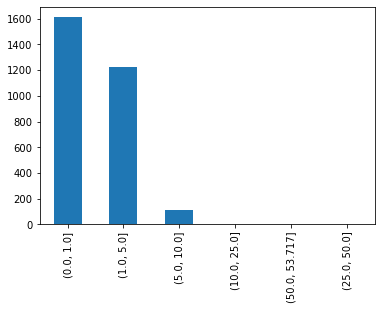

In [4]:
# discretização de 'ABA_MED' pelo método dos intervalos, utilizando 6 intervalos alvo:
# (0, 1] (1, 5] (5, 10] (10, 25] (25, 50] (50, max(ABA_MED)], em que max(ABA_MED) é o maior valor desse atributo
# notar que existem 11 negativos que serão desprezados nessa discretização

# interv_aba = [0, 1, 5, 10, 25, 50, max(dc['ABA_MED'])]
interv_aba = [0, 1, 5, 10, 25, 50, dc['ABA_MED'].max()]

# realizar discretizacao e armazenar
aba_intervalos = pd.cut(dc['ABA_MED'], bins=interv_aba)

# inserir nova coluna
ncols = dc.shape[1]             
dc.insert(ncols, 'ABA_I', aba_intervalos)

# exibir o tipo da coluna
print(dc['ABA_I'].dtype.name)
print(dc['ABA_I'].value_counts())
dc['ABA_I'].value_counts().plot(kind='bar') 

### Questão 3)


Normalize 2 variáveis da base: ABA_MED e APR_3
* APR_3 utilizando normalização min-max com mínimo 0 e máximo 1
* ABA_MED utilizando normalização robusta

Para isso, codifique funções que recebam uma coluna por parâmetro e retornem um atributo já normalizado

Depois, aplique as funções e crie novas variáveis com os atributos normalizados: APR_3_01 e ABA_MED_nr.

Após a normalização, quais os valores de média, desvio padrão, mínimo e máximo dessas novas variáveis, arredondando para 1 casa decimal?

(a) APR_3_01: 0.0, 1.0, 0.0, 1.0; ABA_MED_nr: 0.3, 1.1, -0.5, 30.8<br>
(b) APR_3_01: 0.7, 0.4, 0.0, 1.0; ABA_MED_nr: 0.3, 0.7, -1.0, 53.8<br>
(c) APR_3_01: 0.0, 1.0, 0.0, 1.0; ABA_MED_nr: 0.3, 0.7, -1.0, 53.8<br>
<font color='red'>(d) APR_3_01: 0.7, 0.4, 0.0, 1.0; ABA_MED_nr: 0.3, 1.1, -0.5, 30.8<br></font>

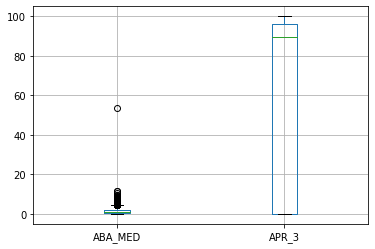

In [5]:
att = ['ABA_MED', 'APR_3']
dc.boxplot(att)

In [6]:
# função para normalização pelo método z-score
def norm_zscore(att):
    # computa média e desvio padrao
    var_mean = att.mean()
    var_sigm = att.std()
    # computa normalização
    att_norm = (att - var_mean) / var_sigm
    return att_norm

# função para normalização pelo método min-max p/ o intervalo 0-1
def norm_minmax_0_1(att):
    # computa o mínimo e o máximo
    var_min = att.min()
    var_max = att.max()
    # computa normalização
    att_norm = (att - var_min) / (var_max - var_min)
    return att_norm

# função para normalização pelo método robusto
def norm_robusta(att):
    # computa a mediana os os quartis
    var_median = att.median()
    q25 = att.quantile(0.25)
    q75 = att.quantile(0.75)
    # computa normalização
    att_norm = (att - var_median) / (q75 - q25)
    return att_norm

# função para normalização pela norma L-infinito 
def norm_linf(att):
    # computa o máximo
    var_max = att.max()
    # computa normalização
    att_norm = (att) / (var_max)
    return att_norm

In [7]:
# normalizando
dc['APR_3_01'] = norm_minmax_0_1(dc['APR_3'])
dc['ABA_MED_nr'] = norm_robusta(dc['ABA_MED'])

In [8]:
print(dc.columns.values[-2])
round(dc['APR_3_01'].describe()[[0,1,2,3,7]], 1)

APR_3_01


count    5220.0
mean        0.7
std         0.4
min         0.0
max         1.0
Name: APR_3_01, dtype: float64

In [9]:
print(dc.columns.values[-1])
round(dc['ABA_MED_nr'].describe()[[0,1,2,3,7]], 1)

ABA_MED_nr


count    2966.0
mean        0.3
std         1.1
min        -0.5
max        30.8
Name: ABA_MED_nr, dtype: float64

### Questão 4)
 
 Transforme os atributos 'ABA_2' e 'ABA_MED' por meio da função da raiz quadrada. Para isso:
1. Faça uma cópia da base de dados, e nessa cópia remova todas as linhas cujos atributos possuem valor 0 ou Nulos (`NaN`) em 'ABA_2' ou 'ABA_MED'
2. Considerando os atributos 'ABA_2' e 'ABA_MED' transforme-os esses utilizando a operação da raiz quadrada no seguinte formato. Seja $x$ o atributo original, obtemos a sua versão transformada:
$$x' = \sqrt{x+1}$$
e os adicione à base de dados com novos nomes, ex. 'sqrtABA_2' e  'sqrtABA_MED',
3. Calcule a correlação entre os atributos após a transformação do passo 2 (utilize o método `.corr()`)

Qual o valor obtido da correlação entre essas novas variáveis ('sqrtABA_2' e 'sqrtABA_MED') ao arredondar para 2 casas decimais?

(a) 0.85<br>
<font color='red'>(b) 0.81<br></font>
(c) 0.77<br>
(d) 1.0<br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C1BBC6CD0>,
      dtype=object)

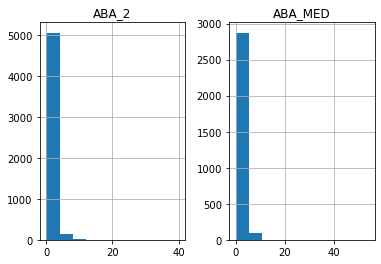

In [10]:
atts = ['ABA_2', 'ABA_MED']
dc[atts].hist()

In [11]:
# cópia da base de dados, e remoção das linhas com valor 0 ou Nulos (NaN) em 'ABA_2' ou 'ABA_MED'
dc2 = dc.copy()
dc2 = dc2[(~dc2['ABA_2'].isna()) & (~dc2['ABA_MED'].isna()) & (dc2['ABA_2']!=0) & (dc2['ABA_MED']!=0)]

In [16]:
# função para transformação pela raiz quadrada sqrt(x+1) 
def sqrt_x_mais_1(att):
    # computa transformação
    att_sqrt = np.sqrt(att+1)
    return att_sqrt

In [17]:
# transformando
dc2['sqrtABA_2'] = sqrt_x_mais_1(dc2['ABA_2'])
dc2['sqrtABA_MED'] = sqrt_x_mais_1(dc2['ABA_MED'])

In [18]:
# correlação entre os atributos
attrs = ['ABA_2','ABA_MED', 'sqrtABA_2', 'sqrtABA_MED']
attrs = ['sqrtABA_2', 'sqrtABA_MED']
round(dc2[attrs].corr(), 2)

,sqrtABA_2,sqrtABA_MED
sqrtABA_2,1.00,0.81
sqrtABA_MED,0.81,1.00


### Questão 5)
 
Utilize a base de dados antes da modificação feita na Questão 4. Codifique a variável categórica 'ABA_Q' para o tipo categórica ordinal e 'NM_MUNICIPIO:' para categórica nominal:
* Para ABA_Q use números inteiros sequenciais, iniciados por 0, para codificar a variável na ordem dos valores dos intervalos e gere um novo atributo ABA_Q_cod. 
* Para NM_MUNICIPIO use números inteiros sequenciais, iniciados por 0 para codificar a variável em ordem alfabética, e gere um novo atributo NM_MUN_cod. 

Observação: aqui a intenção é que o atributo codificação tenha relação com a ordem alfabética do município. Se a intenção fosse a de posteriormente aplicar métodos que realizam comparação por distância independente da ordem alfabética, a codificação ideal seria one-hot-encoding/dummy variables.

Use a função `value_counts()` para mostrar a frequência dos códigos de ABA_Q_cod e NM_MUN_cod. Responda abaixo quais **valores discretos** (após codificação realizada) possuem a maior frequência (maior contagem):

(a) NM_MUN_cod: código 1124;  ABA_Q_cod: códigos 0 e 2<br>
(b) NM_MUN_cod: código 563;  ABA_Q_cod: código 0 e 1<br>
(c) NM_MUN_cod: código 1124;  ABA_Q_cod: códigos 0 e 1<br>
<font color='red'>(d) NM_MUN_cod: código 563;  ABA_Q_cod: códigos 0 e 3<br></font>

In [144]:
# Codificando a variável categórica 'ABA_Q' para categórica ordinal
dc['ABA_Q'].value_counts()

(-0.0043300000000000005, 0.143]    431
(0.617, 1.09]                      431
(1.766, 2.91]                      425
(0.314, 0.617]                     424
(2.91, 53.717]                     423
(0.143, 0.314]                     417
(1.09, 1.766]                      415
Name: ABA_Q, dtype: int64

In [154]:
# criando uma lista para categorização por números inteiros sequenciais, iniciados por 0
cat_ABA_Q = np.sort(dc.loc[dc['ABA_Q'].notnull(), 'ABA_Q'].unique())
num_recurso = np.arange(cat_ABA_Q.shape[0])
print(cat_ABA_Q)
print(num_recurso)

[Interval(-0.0043300000000000005, 0.143, closed='right')
 Interval(0.143, 0.314, closed='right')
 Interval(0.314, 0.617, closed='right')
 Interval(0.617, 1.09, closed='right')
 Interval(1.09, 1.766, closed='right')
 Interval(1.766, 2.91, closed='right')
 Interval(2.91, 53.717, closed='right')]
[0 1 2 3 4 5 6]


In [155]:
# criando um dicionário para categorizar a variável segundo sua ordenação
map_recurso = dict(zip(cat_ABA_Q, num_recurso))
print("\nDicionário:")
print(map_recurso)
# a partir do dicionário criar um mapa entre os valores existentes e a nova coluna com valores numéricos
dc['ABA_Q_cod'] = dc['ABA_Q'].map(map_recurso)
dc[['ABA_Q_cod', 'ABA_Q']].tail()


Dicionário:
{Interval(-0.0043300000000000005, 0.143, closed='right'): 0, Interval(0.143, 0.314, closed='right'): 1, Interval(0.314, 0.617, closed='right'): 2, Interval(0.617, 1.09, closed='right'): 3, Interval(1.09, 1.766, closed='right'): 4, Interval(1.766, 2.91, closed='right'): 5, Interval(2.91, 53.717, closed='right'): 6}


,ABA_Q_cod,ABA_Q
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [160]:
# Codificando a variável categórica 'NM_MUNICIPIO' para categórica nominal'
dc['NM_MUNICIPIO'].value_counts()

SAO PAULO      1116
GUARULHOS       170
CAMPINAS        165
SANTO ANDRE      89
SOROCABA         82
               ... 
MOTUCA            1
PIRATININGA       1
MARINOPOLIS       1
SALES             1
ELISIARIO         1
Name: NM_MUNICIPIO, Length: 644, dtype: int64

In [161]:
# codificando 'NM_MUNICIPIO' com núm.inteiros sequenciais, iniciados por 0 para codificar a variável em ordem alfabética
# Nan = -1
dc['NM_MUN_cod'] = dc['NM_MUNICIPIO'].astype("category").cat.codes
dc[['NM_MUN_cod', 'NM_MUNICIPIO']].sample(5)

,NM_MUN_cod,NM_MUNICIPIO
746,64,BARUERI
805,266,ITAQUAQUECETUBA
3911,332,MAUA
704,604,TATUI
4019,233,IGUAPE


In [162]:
# códigos numéricos com maior contagem
print(dc['ABA_Q_cod'].value_counts())
print(dc['NM_MUN_cod'].value_counts())

0    431
3    431
5    425
2    424
6    423
1    417
4    415
Name: ABA_Q_cod, dtype: int64
563    1116
214     170
108     165
535      89
582      82
       ... 
616       1
620       1
624       1
246       1
643       1
Name: NM_MUN_cod, Length: 644, dtype: int64
